# 1st Try

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

# Libraries

In [ ]:
pip install torch

In [ ]:
!pip install -U sentence-transformers

In [ ]:
pip install opencv-python

In [ ]:
!pip install torchmetrics

In [30]:
!pip install transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [31]:
!pip install sentence_transformers

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [32]:

from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
!pip install nltk


In [ ]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [ ]:
nltk.download('wordnet')

[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [33]:

import os
import random
import pandas as pd
import string
import torch
from torchvision.transforms import ToTensor
from PIL import Image
import numpy as np
from torch.utils.data import Dataset,DataLoader
from sentence_transformers import SentenceTransformer
import torch.nn as nn
import torch.nn.functional as F
from torch.utils.data import random_split 
from transformers import AutoTokenizer, AutoModel
import torch.nn.functional as F
import torchvision
import json
import torch.optim as optim
import torchvision.models as m
import nltk
from nltk.stem import WordNetLemmatizer, PorterStemmer
txtModel = SentenceTransformer('all-mpnet-base-v2')

In [ ]:
device = 'cuda' if torch.cuda.is_available() else 'cpu'

# Dataset Loader

In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/Project/sentiment/sentiment.csv')
df=df[['filename','raw','sentiment','split']]
df=df[df['filename']!='COCO_val2014_000000421673.jpg']
df=df[df['filename']!='COCO_val2014_000000359276.jpg']
df=df[df['filename']!='COCO_val2014_000000130712.jpg']
df=df[df['filename']!='COCO_val2014_000000310622.jpg']
clean_text = lambda text: text.lower().translate(str.maketrans('', '', string.punctuation))
df['raw'] = df['raw'].apply(clean_text)
def lemmatize_text(text):
    lemmatizer = WordNetLemmatizer()
    return ' '.join([lemmatizer.lemmatize(word) for word in nltk.word_tokenize(text)])

#stem the text
def stem_text(text):
    stemmer = PorterStemmer()
    return ' '.join([stemmer.stem(word) for word in nltk.word_tokenize(text)])

df['raw'] = df['raw'].apply(lemmatize_text)
df['raw'] = df['raw'].apply(stem_text)

vgg=m.vgg16(pretrained=True)
vgg.to(device)

class CustomDataset(Dataset):
    def __init__(self, df, model, train):
        self.df = df
        self.model = model
        self.train = train
        
        if self.train == 'train':
            self.df = self.df[self.df['split'] == 'train']
        elif self.train == 'valid':
            self.df = self.df[self.df['split'] == 'val']
        else:
            self.df = self.df[self.df['split'] == 'test']
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        
        z=torch.tensor(int(self.df.iloc[index,2]))
        
#         txtModel = SentenceTransformer('all-mpnet-base-v2')
        x=self.model.encode(self.df.iloc[index,1])
        x = torch.tensor(x)
        
        x = F.pad(x, (0,100-x.size()[0]))

        # tried manually
#         txtEmbedings=[]
#         for i, row in df.iterrows():
#             txtEmbedings.append(generateTextEmbedings(txtModel,row['raw']))
#         for i in txtEmbedings:
#             while len(i)!=481:    #padding
#                 i.append(0)
        #if df.shape[0]==len(txtEmbedings):
#         df['embedings']=txtEmbedings
#         image = Image.imread(r'C:\Users\Dell\sentiment_images'+self.df.iloc[index,0])
#         image = Image.cvtColor(image, cv2.COLOR_BGR2RGB)

        image = Image.open(r'/content/gdrive/MyDrive/Project/sentiment/sentiment_images/'+self.df.iloc[index,0])

        image = image.convert('RGB')
        transform = torchvision.transforms.Compose([
        torchvision.transforms.Resize((100,100)),
#         torchvision.transforms.CenterCrop(224),
        ToTensor(),
        torchvision.transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
        ])
        
        y = transform(image).to(device)
        
        with torch.no_grad():
            y=vgg.features(y)

        return (y,x,z)
counter=0
for i,row in df.iterrows():
    if row['split']!='train':
        counter+=1
print(counter)
df


/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=VGG16_Weights.IMAGENET1K_V1`. You can also use `weights=VGG16_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


19802


,filename,raw,sentiment,split
0,COCO_val2014_000000389081.jpg,a plate of delici food includ french fri,1,train
1,COCO_val2014_000000389081.jpg,french fri are not a healthi food but it is an...,1,train
2,COCO_val2014_000000389081.jpg,the plate ha one of my favorit food on it fren...,1,train
3,COCO_val2014_000000389081.jpg,it wa disgust food not just bad food,0,train
4,COCO_val2014_000000389081.jpg,a plate of disgust food found at a diner,0,train
...,...,...,...,...
39194,COCO_val2014_000000190705.jpg,a dirti bathroom that ha a dirti window made o...,0,test
39195,COCO_val2014_000000190705.jpg,a dirti bathroom that ha a window in it,0,test
39196,COCO_val2014_000000190705.jpg,a towel that is on a rack in a dirti bathroom,0,test
39197,COCO_val2014_000000190705.jpg,a dirti bathroom that ha a dirti window made o...,0,test


# Models

In [ ]:
class model01(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(4608,350)
        #self.act_fn = nn.ReLU()
        self.act_fn = nn.Tanh()
        # self.act_fn2 = nn.Sigmoid()
        self.linear2 = nn.Linear(350,250)
        self.linear3 = nn.Linear(250, 5)
        

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        return x
    

class model02(nn.Module):

    def __init__(self,):
        super().__init__()
    
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(100,200)
        self.act_fn = nn.ReLU()
        self.act_fn2 = nn.Tanh()
        self.linear2 = nn.Linear(200, 80)
        self.linear3 = nn.Linear(80, 5)
        

    def forward(self, x):

        x = self.flatten(x)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn2(x)
        x = self.linear3(x)
        return x

class modelCombined(nn.Module):

    def __init__(self, M1,M2):
        super().__init__()
        self.M1=M1
        self.M2=M2
        
        self.linear1 = nn.Linear(10, 30)
        self.act_fn = nn.ReLU()
        self.linear2 = nn.Linear(30, 20)
        self.linear3 = nn.Linear(20, 18)
        self.linear4 = nn.Linear(18, 15)
        self.linear5 = nn.Linear(15, 12)
        self.linear6 = nn.Linear(12, 10)
        self.linear7 = nn.Linear(10, 5)
        self.linear8 = nn.Linear(5, 1)
        

    def forward(self, y,z):
        y=self.M1(y)
        z=self.M2(z)
        x = torch.cat((y, z), dim=1)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.linear4(x)
        x = self.act_fn(x)
        x = self.linear5(x)
        x = self.act_fn(x)
        x = self.linear6(x)
        x = self.act_fn(x)
        x = self.linear7(x)
        x = self.act_fn(x)
        x = self.linear8(x)
        return x

In [ ]:
M1=model01().to(device)
M2=model02().to(device)
model = modelCombined(M1, M2).to(device)
print(model)

modelCombined(
  (M1): model01(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear1): Linear(in_features=4608, out_features=350, bias=True)
    (act_fn): Tanh()
    (linear2): Linear(in_features=350, out_features=250, bias=True)
    (linear3): Linear(in_features=250, out_features=5, bias=True)
  )
  (M2): model02(
    (flatten): Flatten(start_dim=1, end_dim=-1)
    (linear1): Linear(in_features=100, out_features=200, bias=True)
    (act_fn): ReLU()
    (act_fn2): Tanh()
    (linear2): Linear(in_features=200, out_features=80, bias=True)
    (linear3): Linear(in_features=80, out_features=5, bias=True)
  )
  (linear1): Linear(in_features=10, out_features=30, bias=True)
  (act_fn): Tanh()
  (linear2): Linear(in_features=30, out_features=20, bias=True)
  (linear3): Linear(in_features=20, out_features=15, bias=True)
  (linear4): Linear(in_features=15, out_features=10, bias=True)
  (linear5): Linear(in_features=10, out_features=1, bias=True)
)


# Train Test

In [ ]:
train_dataset = CustomDataset(df, txtModel, train='train')
test_dataset = CustomDataset(df, txtModel, train='valid')
finaltest_dataset = CustomDataset(df, txtModel, train='test')

In [ ]:
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=64)
finaltest_loader=DataLoader(finaltest_dataset, batch_size=64)

#debuging
# for i,x in enumerate(train_loader):
#     img,txt,label = x
#     print(txt.shape)
#     break

In [ ]:
image = Image.open(r'/content/gdrive/MyDrive/Project/sentiment/sentiment_images/'+df.iloc[3,0])

# Training Model

In [ ]:
# criterion = torch.nn.CrossEntropyLoss().to(device)
criterion = torch.nn.BCEWithLogitsLoss().to(device)
optimizer = optim.SGD(model.parameters(),lr=1e-3)

epochs = 5

for i in range(epochs):
    model.train().to(device)
    train_loss = 0.0
    for data,label in enumerate(train_loader):
        img,txt,y = label
#         print(img.shape)
#         print(txt.shape)
#         print(y.unsqueeze(-1).size())
        optimizer.zero_grad()
        output = model(img.to(device),txt.to(device))
        # print(output.squeeze())
#         break
        loss = criterion(output.squeeze(-1).float().to(device), y.float().to(device)) #.unsqueeze(-1).float()# pass the output tensor to the criterion function
        loss.backward()
        optimizer.step()
        train_loss += loss.item() 
        print(f'Epoch: {i+1} \t\t\t Iteration {data+1} Loss Train: {loss.item()}')
    model.eval().to(device)
    validation_loss = 0.0
    with torch.no_grad():
        for data,label in enumerate(test_loader):
          img,txt,y = label
          optimizer.zero_grad()
          output = model(img.to(device),txt.to(device))
  #         print(output.squeeze(-1).size())
  #         break
          loss = criterion(output.squeeze(-1).float().to(device), y.float().to(device)) #.unsqueeze(-1).float()# pass the output tensor to the criterion function
          train_loss += loss.item() 
          print(f'Epoch: {i+1} \t\t\t Iteration {data+1} Loss Valid: {loss.item()}')

    print(f'Epoch: {i+1} / {epochs} \t\t\t Training Loss:{(train_loss/len(train_loader))}')

Epoch: 1 			 Iteration 1 Loss Train: 0.7016758322715759
Epoch: 1 			 Iteration 2 Loss Train: 0.6929707527160645
Epoch: 1 			 Iteration 3 Loss Train: 0.6912208199501038
Epoch: 1 			 Iteration 4 Loss Train: 0.6824958324432373
Epoch: 1 			 Iteration 5 Loss Train: 0.694713830947876
Epoch: 1 			 Iteration 6 Loss Train: 0.7034436464309692
Epoch: 1 			 Iteration 7 Loss Train: 0.7033905982971191
Epoch: 1 			 Iteration 8 Loss Train: 0.7016528844833374
Epoch: 1 			 Iteration 9 Loss Train: 0.7033727765083313
Epoch: 1 			 Iteration 10 Loss Train: 0.7016185522079468
Epoch: 1 			 Iteration 11 Loss Train: 0.6877783536911011
Epoch: 1 			 Iteration 12 Loss Train: 0.7033379077911377
Epoch: 1 			 Iteration 13 Loss Train: 0.703331708908081
Epoch: 1 			 Iteration 14 Loss Train: 0.699857771396637
Epoch: 1 			 Iteration 15 Loss Train: 0.7015633583068848
Epoch: 1 			 Iteration 16 Loss Train: 0.6929572820663452
Epoch: 1 			 Iteration 17 Loss Train: 0.6877619028091431
Epoch: 1 			 Iteration 18 Loss Train: 0.708

In [ ]:
torch.save(model.state_dict(),"trainedAt100epochs.pth")

# Testing Model

In [ ]:
def computeF1Score(preds,targets):
    TP,FP,FN=0,0,0
    for i in range(len(preds)):
        if preds[i]==1 and targets[i]==1:
            TP+=1
        if preds[i]==1 and targets[i]==0:
            FP+=1
        if preds[i]==0 and targets[i]==1:
            FN+=1
    if TP==0:
        TP+=1
    precision = TP / (TP + FP)
    recall = TP / (TP + FN)

    f1_score = 2 * (precision * recall) / (precision + recall)

    return f1_score

In [ ]:
test_loss = 0.0
correct, total = 0,0
preds=[]
targets=[]
model.load_state_dict(torch.load("trainedAt100epochs.pth"))
model.eval().to(device)
for data,label in enumerate(finaltest_loader):
    img,txt,y = label
    output = model(img.to(device),txt.to(device))
    output = torch.sigmoid(output)
    for o,l in zip(output,y):
        o = o.round()
#         print(o)
#         print(l)
        preds.append(int(o))
        targets.append(int(l))
        if o == l:
            correct += 1
        total += 1
    output = output.squeeze(-1).float() 
    loss = criterion(output.to(device),y.float().to(device))
    test_loss += loss.item()

print(f'Testing Loss:{test_loss/len(test_loader)}')
print(f'Correct Predictions: {correct}/{total}')
print(f'Accuracy:', correct/total*100,'%')
print('F1 Score: ',computeF1Score(preds,targets))

Testing Loss:2.8605461589625625
Correct Predictions: 8721/15912
Accuracy: 54.807692307692314 %
F1 Score:  0.7080745341614907


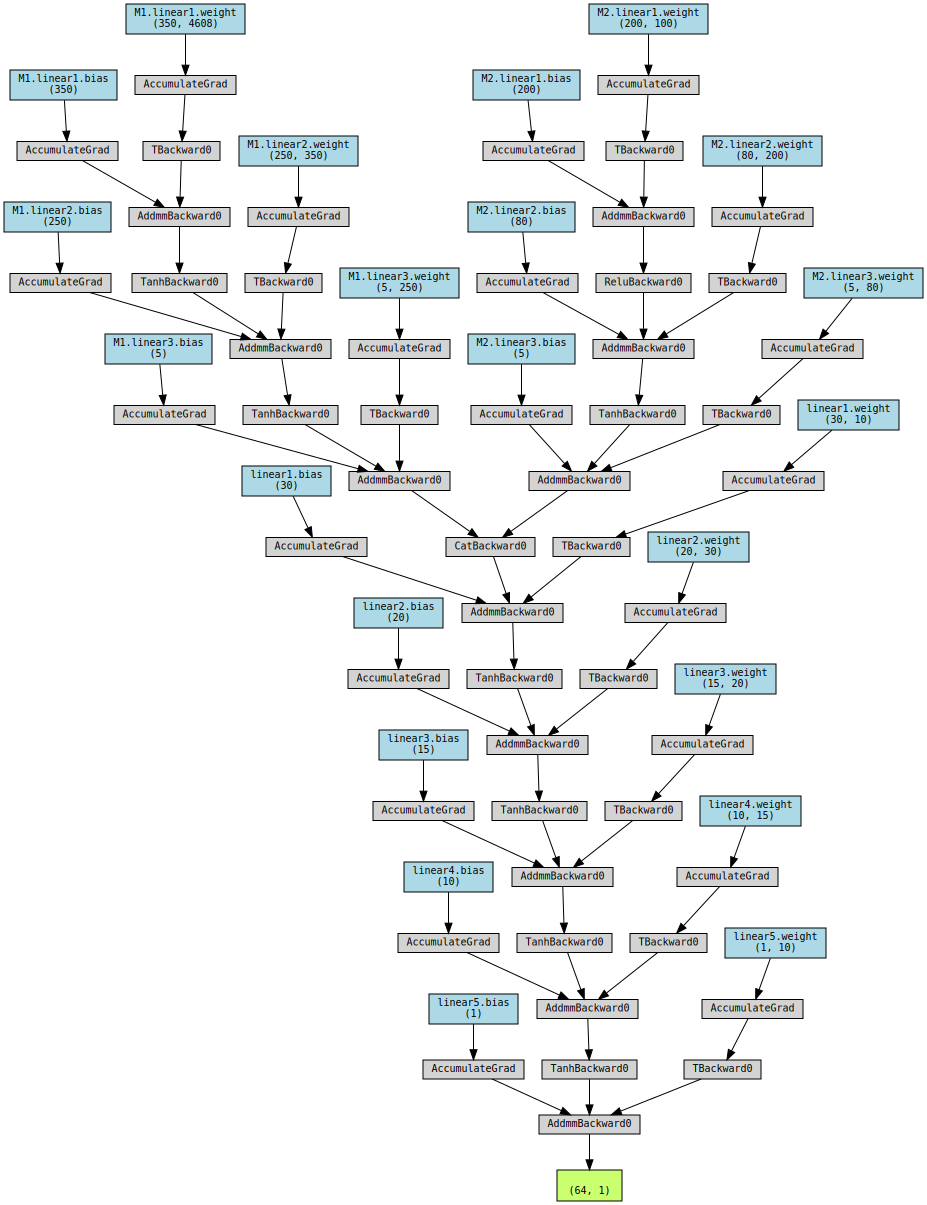

In [ ]:
from torchviz import make_dot
batch = next(iter(finaltest_loader))
out=model(batch[0].to(device),batch[1].to(device))
make_dot(out,params=dict(list(model.named_parameters())))

# Task 02

In [34]:
import pandas as pd
import json
df = pd.read_csv('/content/gdrive/MyDrive/Project/sentiment/sentiment.csv')
df=df[['tokens','word_sentiment']]

for _, row in df.iterrows():
    x = row['tokens']
    x = x[1:-1]  #remove the surrounding quotes
    x = [s.strip() for s in x.split(',')]  #rplit the string into individual strings
    new = []
    for i in x:
        i = i.replace("'", '')   #converting token strings to lists
        new.append(i)
    df.at[_, 'tokens'] = new


def getIntList(x):
    x=json.loads(x)
    intList=[]
    for i in x:
        intList.append(int(i))
    return intList
for i,row in df.iterrows():
    row['tokens'].insert(0, '*')
    row['tokens'].append('*')
    row['word_sentiment']=getIntList(row['word_sentiment'])
print(type(df.iloc[0,1]))

for i,row in df.iterrows():
    x=row['tokens']
    trigrams=[]
    for trigram in zip(x, x[1:], x[2:]):
        trigram_str = ' '.join(trigram)
        trigrams.append(trigram_str)
    row['tokens']=trigrams

df = df.explode(['tokens','word_sentiment'])
df = df.reset_index(drop=True)
# df = finalDf.drop('index', axis=1,drop_first=True)
df.drop_duplicates('tokens',inplace=True)

class CustomDataset(Dataset):
    def __init__(self, df, model):
        self.df = df
        self.model = model
        
    def __len__(self):
        return len(self.df)
    
    def __getitem__(self, index):
        
        x=self.model.encode(self.df.iloc[index,0])
        x = torch.tensor(x)
        x = F.pad(x, (0,15-x.size()[0]))
        
        y=torch.tensor(int(self.df.iloc[index,1]))
        
        return (x,y)
df

<class 'list'>


,tokens,word_sentiment
0,* a plate,0
1,a plate of,0
2,plate of delicious,0
3,of delicious food,1
4,delicious food including,1
...,...,...
471504,on a rack,0
471505,a rack in,0
471518,window made of,0
471519,made of dead,0


# Model 

In [35]:
class myModel(nn.Module):

    def __init__(self):
        super().__init__()
        
        self.flatten = nn.Flatten()
        self.linear1 = nn.Linear(15,250)
        self.act_fn = nn.ReLU()
        self.linear2 = nn.Linear(250,90)
        self.linear3 = nn.Linear(90, 50)
        self.linear4 = nn.Linear(50, 20)
        self.linear5 = nn.Linear(20, 1)
        

    def forward(self, x):
        x = self.flatten(x)
        x = self.linear1(x)
        x = self.act_fn(x)
        x = self.linear2(x)
        x = self.act_fn(x)
        x = self.linear3(x)
        x = self.act_fn(x)
        x = self.linear4(x)
        x = self.act_fn(x)
        x = self.linear5(x)
        return x

    
model=myModel().to(device)
print(model)

myModel(
  (flatten): Flatten(start_dim=1, end_dim=-1)
  (linear1): Linear(in_features=15, out_features=250, bias=True)
  (act_fn): ReLU()
  (linear2): Linear(in_features=250, out_features=90, bias=True)
  (linear3): Linear(in_features=90, out_features=50, bias=True)
  (linear4): Linear(in_features=50, out_features=20, bias=True)
  (linear5): Linear(in_features=20, out_features=1, bias=True)
)


In [36]:
myDataset=CustomDataset(df,txtModel)
train,test=random_split(myDataset, [44631, 11158])

train_loader = DataLoader(train, batch_size=32)
test_loader = DataLoader(test, batch_size=32)

# train_dataset = CustomDataset(df, txtModel, train=True)
# test_dataset = CustomDataset(df, txtModel, train=False)

# train_loader = DataLoader(train_dataset, batch_size=32, shuffle=True)
# test_loader = DataLoader(test_dataset, batch_size=32)

# Training Model

In [37]:
import torch.optim as optim
criterion = torch.nn.BCEWithLogitsLoss().to(device)
optimizer = optim.SGD(model.parameters(),lr=0.8)


epochs = 5

for i in range(epochs):
    train_loss = 0.0
    for data,label in enumerate(train_loader):
        txt,y = label
#         print(txt.shape)
#         print(y.unsqueeze(-1).size())
        optimizer.zero_grad()
        
        
        output = model(txt.float().to(device))
#         print(output.size())
#         break
        loss = criterion(output.squeeze(-1).float().to(device), y.float().to(device)) #pass the output tensor to the criterion function
        loss.backward()
        
        optimizer.step()
        
        train_loss += loss.item() 
        print(f'Epoch: {i+1} \t\t\t Iteration {data+1} Loss Train: {loss.item()}')
    print(f'Epoch: {i+1} / {epochs} \t\t\t Training Loss:{train_loss/len(train_loader)}')


Streaming output truncated to the last 5000 lines.
Epoch: 2 			 Iteration 585 Loss Train: 0.32769307494163513
Epoch: 2 			 Iteration 586 Loss Train: 0.3854067623615265
Epoch: 2 			 Iteration 587 Loss Train: 0.42654767632484436
Epoch: 2 			 Iteration 588 Loss Train: 0.5569896697998047
Epoch: 2 			 Iteration 589 Loss Train: 0.3709520697593689
Epoch: 2 			 Iteration 590 Loss Train: 0.39385437965393066
Epoch: 2 			 Iteration 591 Loss Train: 0.4436744451522827
Epoch: 2 			 Iteration 592 Loss Train: 0.4476075768470764
Epoch: 2 			 Iteration 593 Loss Train: 0.438536673784256
Epoch: 2 			 Iteration 594 Loss Train: 0.3813953399658203
Epoch: 2 			 Iteration 595 Loss Train: 0.6996951699256897
Epoch: 2 			 Iteration 596 Loss Train: 0.5123264193534851
Epoch: 2 			 Iteration 597 Loss Train: 0.42081522941589355
Epoch: 2 			 Iteration 598 Loss Train: 0.40203213691711426
Epoch: 2 			 Iteration 599 Loss Train: 0.5075157880783081
Epoch: 2 			 Iteration 600 Loss Train: 0.4379410147666931
Epoch: 2 			 Iter

In [38]:
torch.save(model.state_dict(),"trainedAtepochs.pth")

# Testing Model

In [40]:
test_loss = 0.0
correct, total = 0,0
preds=[]
targets=[]
model.load_state_dict(torch.load("trainedAtepochs.pth"))
for data,label in enumerate(test_loader):
    txt,y = label
    output = model(txt.float().to(device))
    output=torch.sigmoid(output)
    for o,l in zip(torch.argmax(output,axis = 1),y.float()):
        o=o.round()
#         print(o)
#         print(l)
        preds.append(int(o))
        targets.append(int(l))
        if o == l:
            correct += 1
        total += 1
    output = output.squeeze(-1).float() 
    loss = criterion(output,y.float().to(device))
    test_loss += loss.item()

print(f'Testing Loss:{test_loss/len(test_loader)}')
print(f'Correct Predictions: {correct}/{total}')
print(f'Accuracy:', correct/total*100,'%')
print('F1 Score: ',computeF1Score(preds,targets))

Testing Loss:0.8649061182166922
Correct Predictions: 9284/11158
Accuracy: 83.20487542570353 %
F1 Score:  0.2506607316733899


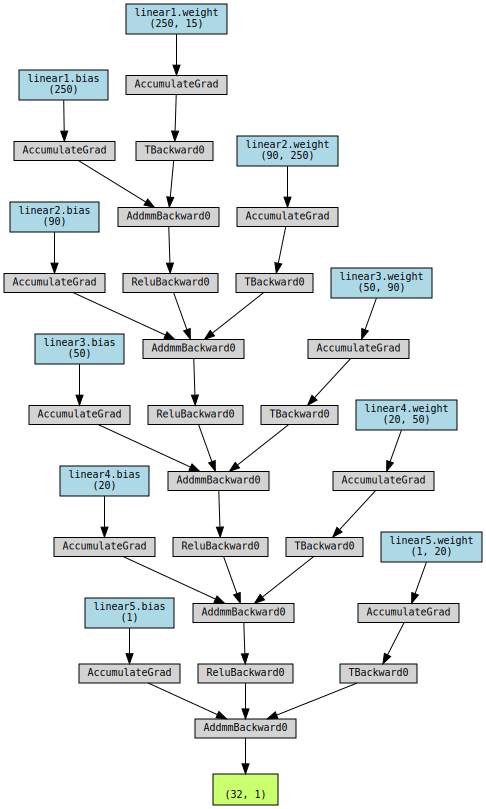

In [ ]:
from torchviz import make_dot
batch = next(iter(train_loader))
out=model(batch[0].to(device))
make_dot(out,params=dict(list(model.named_parameters())))

---

**Note:** I have tried my best to provide accurate results in this notebook. However, these results may not be entirely accurate, and contributions or corrections are encouraged. Thank you!
